In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Wavefront_Generation as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'2',
    'C_time':'4',
    'L_impedance':'100',
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        100
Inductor Capacitance Per Length :       0.01
Inductor Length :                       1
Inductor Total Inductance :             100
Inductor Total Capacitance :            0.01
Inductor Velocity :                     1
Inductor One Way Time Delay :           1
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       2
Capacitor Capacitance Per Length :      2
Capacitor Length :                      1
Capacitor Total Inductance :            2
Capacitor Total Capacitance :           2
Capacitor Velocity :                    0.5
Capacitor One Way Time Delay :          2
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  88.85765876317317303972375656
Number of Wavefronts :                  4324
Number of Layers :                      46
Inductor Return Time Delay 

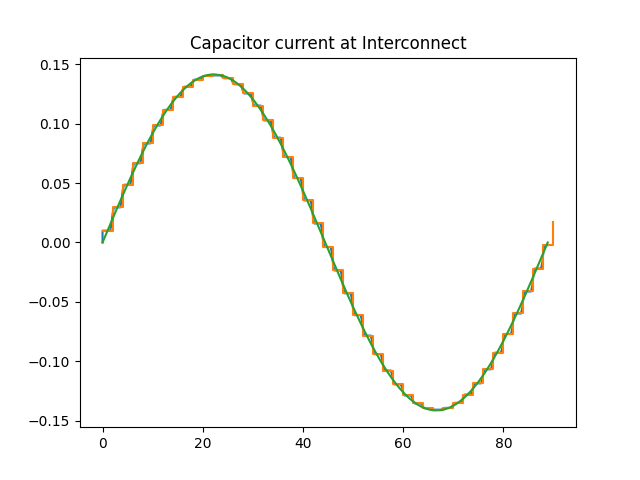

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

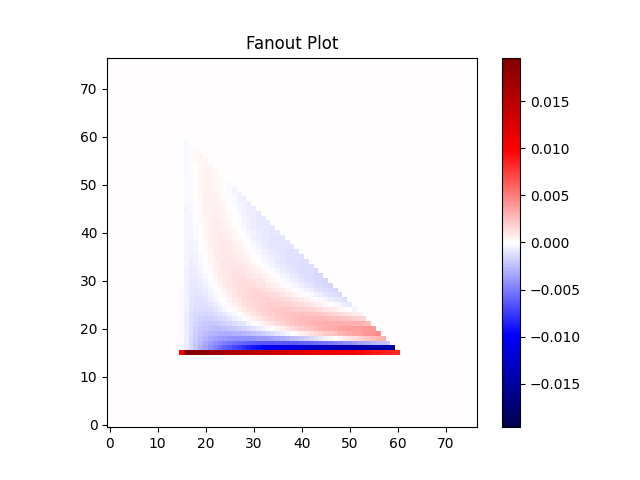

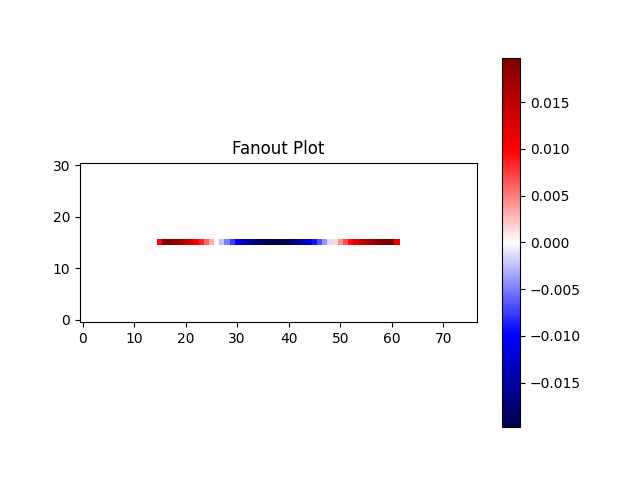

In [4]:
fig_fanout_commutative,ax_fanout_commutative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_commutative.Current_Interconnect_Capacitor.transpose(),ax_fanout_commutative)

fig_fanout_multiplicative,ax_fanout_multiplicative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_multiplicative.Current_Interconnect_Capacitor.transpose(),ax_fanout_multiplicative)